In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df = pd.read_csv("lamudi_clean.csv").drop(columns='Unnamed: 0')

In [5]:
df.head()

,title,price,address,township,car_boxes,rooms,bathroms,squareM,description
0,bonita vista y privacidad,10700.00,"ignacio manuel altamirano 130 san rafael, cuau...",cuauhtemoc,1.00,1.00,1.00,50.00,excelente departamento en una ubicacion muy c...
1,renta departamento tres recamaras en sendero a...,25500.00,"santa fe cuajimalpa, cuajimalpa de morelos",cuajimalpa,0.00,3.00,3.00,164.00,departamento en residencial sendero a 5 min d...
2,renta departamento en la condesa,17000.00,"zamora 69 condesa, cuauhtemoc",cuauhtemoc,1.00,2.00,1.00,107.00,precioso inmejorable ubicacion en perfecto es...
3,rento departamento cuajimalpa cerca de santa fe,12000.00,"coahuila 244 cuajimalpa, cuajimalpa de morelos",cuajimalpa,1.00,2.00,2.00,110.00,excelente departamento en calle coahuila en c...
4,renta departamento polanco,35000.00,"ampliacion granada, miguel hidalgo",miguel hidalgo,2.00,3.00,2.00,125.00,estrena departamento en neuchatel torre a imp...


### Columns: 
* **id:** The ID of the place/apartment/house, given by MongoDb collection.
* **price:** Monthly rent, in MXN
* **title:** Original title of the place/apartment/house advertisement.
* **address:** Address of the place. (Just CDMX)
* **car_boxes:** Number of parking spaces.
* **rooms:** Number of rooms in the place.
* **bathrooms:** Number of bathrooms in the place
* **squareM:** Place surface.
* **date_post:** Date of announcement post
* **description:** Features house summary


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        2655 non-null   object 
 1   price        2655 non-null   float64
 2   address      2655 non-null   object 
 3   township     2655 non-null   object 
 4   car_boxes    2655 non-null   float64
 5   rooms        2655 non-null   float64
 6   bathroms     2655 non-null   float64
 7   squareM      2655 non-null   float64
 8   description  2655 non-null   object 
dtypes: float64(5), object(4)
memory usage: 186.8+ KB


In [7]:
df.description[1]

' departamento en residencial sendero a 5 min del hospital abc centro comercial santa fe y parque la mexicana 164 m2 3 recamaras la principal con vestidor y baño 3 baños y medio sala comedor duela laminada en pisos de sala comedor y recamaras desayunador cocina integral cubierta de granito sala de tv cuarto de servicio con baño completo 2 estacionamientos bodega patio de servicio con calentador y lavadero vigilancia 24 hrs amenidades piscina techada jacuzzi 2 gimnasios 2 salones de jovenes 2 salones de adultos salon de baile salon de usos multiples ludoteca salon de fiestas asoleadero descubierto vestidores area de masaje con descanso sauna y vapor baños y regaderas cancha de squash area de juegos infantiles 2 areas de asadores mantenimiento incluido easybroker id eb cv8205 '

In [8]:
df.title[1]

'renta departamento tres recamaras en sendero a  2 min centro comercial santa fe'

In [9]:
df.describe()

,price,car_boxes,rooms,bathroms,squareM
count,2655.00,2655.00,2655.00,2655.00,2655.00
mean,26734.11,1.54,2.19,2.01,131.80
std,14235.45,0.92,0.70,0.76,88.64
min,2350.00,0.00,1.00,1.00,9.00
25%,17000.00,1.00,2.00,2.00,77.00
50%,23000.00,2.00,2.00,2.00,103.00
75%,32750.00,2.00,3.00,2.00,155.50
max,70000.00,6.00,6.00,6.00,1230.00


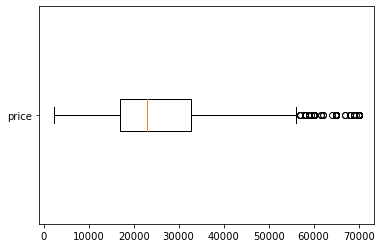

In [10]:
fig, ax = plt.subplots()
ax.boxplot(df.price, vert=0)
plt.yticks([1], ['price'])
plt.show()

#The 50% of the prices are above 23000 MXN
#The Interquartile range is IR = Q3-Q1 = 32750 - 17000 = 15,750
#So the upper barrier is given by => Q3+ 1.5IR= 32750 + 1.5(15750) = 32750 + 23625 = 56375
#The prices beyond the $56375 are atypical.

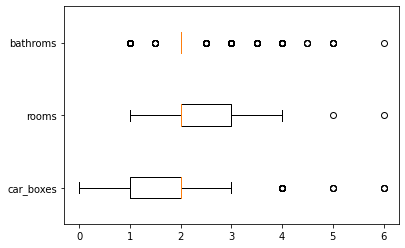

In [11]:
fig, ax = plt.subplots()
columns = df[['car_boxes', 'rooms', 'bathroms']]
ax.boxplot(columns, vert=0)
plt.yticks([1, 2, 3], ['car_boxes', 'rooms', 'bathroms'])
plt.show()

In [12]:
df.describe(include = "object")

,title,address,township,description
count,2655,2655,2655,2655
unique,2459,1148,14,2617
top,departamento en renta en polanco,"polanco, miguel hidalgo",miguel hidalgo,departamento en via santa fe planta baja con ...
freq,16,252,921,8


In [13]:
df[df.township == 'miguel hidalgo']

,title,price,address,township,car_boxes,rooms,bathroms,squareM,description
4,renta departamento polanco,35000.00,"ampliacion granada, miguel hidalgo",miguel hidalgo,2.00,3.00,2.00,125.00,estrena departamento en neuchatel torre a imp...
5,extraordinario departamento en venta o renta ...,18000.00,"granada, miguel hidalgo",miguel hidalgo,1.00,2.00,1.00,60.00,hermoso departamento en venta o renta amuebla...
6,plaza carso: amueblado de 3 recamaras muy lindo,58000.00,"lago zurich 245 ampliacion granada, miguel hid...",miguel hidalgo,2.00,3.00,3.00,121.00,precioso departamento amueblado 121 m2 3 reca...
8,renta departamento amueblado en polanco,34000.00,"ampliacion granada, miguel hidalgo",miguel hidalgo,2.00,3.00,2.00,150.00,excelente departamento ubicado en la zona nue...
13,plaza carso: amueblado de 2 recamaras con fami...,48000.00,"polanco, miguel hidalgo",miguel hidalgo,2.00,2.00,3.00,118.00,departamento de 118 m2 amueblado y equipado 2...
...,...,...,...,...,...,...,...,...,...
2639,plaza carso: departamento de 3 recamaras con t...,70000.00,"lago zurich 245, polanco, miguel hidalgo ampli...",miguel hidalgo,2.00,3.00,4.00,153.00,precioso departamento con terraza privada 153...
2641,plaza carso: 3 recamaras con family room y cua...,48000.00,"lago zurich 272 ampliacion granada, miguel hid...",miguel hidalgo,2.00,3.00,3.00,168.00,departamento de 168 m2 3 recamaras cada una c...
2643,amueblado av. presidente masaryk 123 servicios...,46110.00,"mexico, miguel hidalgo, avenida presidente mas...",miguel hidalgo,1.00,2.00,1.00,66.00,incluyen los siguientes servicios limpieza di...
2649,vive en polanco renta altezza,45000.00,"campos eliseos 177, col. polanco v secc, migue...",miguel hidalgo,2.00,2.00,3.50,180.00,hermoso departamento de 180m2 en dos niveles ...


#### Most expensive places by M2.

In [14]:
#Make a column with price/squareM
df['m2Cost'] = df.price.div(df.squareM)
df = df[['title', 'price', 'address','township', 'car_boxes', 'rooms', 'bathroms',
       'squareM', 'm2Cost', 'description']]
df.sort_values(by = 'm2Cost', ascending= False).head(10)

,title,price,address,township,car_boxes,rooms,bathroms,squareM,m2Cost,description
1315,"departamento en polanco v seccion, miguel hida...",60000.00,"mexico, miguel hidalgo, calle arquimedes polan...",miguel hidalgo,2.00,2.00,3.00,9.00,6666.67,hermoso penthouse amueblado estilo contempora...
1115,renta departamento en santa fe 2 recamaras con...,40000.00,"santa fe santa fe cuajimalpa, cuajimalpa de mo...",cuajimalpa,2.00,3.00,2.00,9.00,4444.44,149 mts 2 recamaras con opcion a 3 2 baños sa...
1651,hermoso departamento en av santa fe,27000.00,"mexico, 05340, cuajimalpa de morelos, avenida ...",cuajimalpa,1.00,2.00,1.00,9.00,3000.00,hermoso departamento en un exclusivo desarrol...
2568,renta departamento de carso residencial vistas...,18000.00,"boulevard manuel avila camacho 611 periodista,...",miguel hidalgo,2.00,1.00,1.00,9.00,2000.00,bonito departamento a estrenar en renta en ca...
2470,"departamento de renta, col escandon",13500.00,"escandon i seccion, miguel hidalgo",miguel hidalgo,0.00,2.00,1.50,9.00,1500.00,2 recamaras c u con closet de pared a pared 1...
225,departamentos totalmente amueblados polanco,18000.00,"polanco, miguel hidalgo",miguel hidalgo,0.00,1.00,1.00,15.00,1200.00,departamentos tipo suite se encuentran en una...
1215,local comercial 15m2 para giro comida en plaza...,14500.00,"cuajimalpa, cuajimalpa de morelos",cuajimalpa,0.00,1.00,1.00,15.00,966.67,codigo 4919510 local comercial de 15 m2 llama...
242,suites amuebladas en polanco,32750.00,"polanco, miguel hidalgo",miguel hidalgo,0.00,1.00,1.00,40.00,818.75,departamento tipo suite en polanco muy bien u...
352,suites amuebladas en polanco,32750.00,"polanco, miguel hidalgo",miguel hidalgo,0.00,1.00,1.00,40.00,818.75,departamento tipo suite en polanco muy bien u...
1076,se renta cuarto amueblado - cuajimalpa,7000.00,"contadero, cuajimalpa de morelos",cuajimalpa,0.00,1.00,1.00,9.00,777.78,codigo 3469639 recamara amueblada que compart...


#### Less expensive places by M2.

In [15]:
df.sort_values(by = 'm2Cost').head(10)
#We see that the first row is a rent per day. So 3100 for every day in month does'nt sound like a good deal.

,title,price,address,township,car_boxes,rooms,bathroms,squareM,m2Cost,description
1916,"polanco, miguel hidalgo, cdmx ""por dia"" se...",3100.00,"polanco, miguel hidalgo",miguel hidalgo,1.00,2.00,2.00,102.00,30.39,por dia servicio de hoteleria apartamentos am...
1909,"bosque de tejocotes, renta de departamento amu...",26000.00,"bosques de las lomas, cuajimalpa de morelos",cuajimalpa,0.00,4.00,4.00,800.00,32.50,bosque de tejocotes renta de departamento amu...
1039,"polanco, miguel hidalgo, cdmx ""por dia"" se...",2350.00,"polanco, miguel hidalgo",miguel hidalgo,1.00,1.00,1.00,65.00,36.15,por dia servicio de hoteleria apartamentos am...
94,renta paseo de las primaveras bosques de las l...,26000.00,"lomas de vista hermosa, cuajimalpa de morelos",cuajimalpa,5.00,4.00,4.00,700.00,37.14,increible departamento vive en el exclusivo f...
2592,departamento en renta en club de golf santa fe,22000.00,"santa fe, alvaro obregon",alvaro obregon,6.00,3.00,3.00,570.00,38.60,espectacular departamento amueblado en renta ...
772,departamento - lomas de vista hermosa,26000.00,"lomas de vista hermosa, cuajimalpa de morelos",cuajimalpa,0.00,3.00,3.00,660.00,39.39,departamento de super lujo en venta y renta e...
2597,departamento en lomas de reforma,32750.00,"lomas de reforma, miguel hidalgo",miguel hidalgo,3.00,3.00,3.00,804.00,40.73,departamento aaa en alcazar de toledo lomas d...
1463,departamento - miguel hidalgo,32750.00,"delegacion politica miguel hidalgo, miguel hid...",miguel hidalgo,0.00,3.00,5.00,750.00,43.67,excelente ph en lomas de chapultepec amueblad...
2496,departamento en renta en villas de la cañada c...,26000.00,"san mateo tlaltenango, cuajimalpa de morelos",cuajimalpa,6.00,3.00,3.00,500.00,52.00,wiggot pbbf1cy departamento en san mateo tlal...
1636,"polanco, socrates, ph de lujo en renta amuebla...",32750.00,"polanco, miguel hidalgo",miguel hidalgo,0.00,4.00,4.00,600.00,54.58,polanco socrates ph de lujo en renta amueblad...


#### Cheapest places with at least 1 roomie... and 2? or 3?

In [16]:
def roomie_best(n, roomie = 1, min_rent = 6000, m2 = 100, ascending = True):
    df2 = df.loc[(df.rooms == roomie) & (df.price <= min_rent) & (df.squareM <= m2),
                ['title','price','township', 'car_boxes', 'rooms', 'bathroms',
                 'squareM']].sort_values(by='price', ascending = ascending).head(n).copy()
    return df2

In [17]:
roomie_best(8, 2, 30000)

,title,price,township,car_boxes,rooms,bathroms,squareM
2229,departamento 2 recamaras col. panamericana,4500.00,gustavo a. madero,0.00,2.00,1.00,70.00
2509,departamento en renta,5000.00,iztapalapa,0.00,2.00,1.00,50.00
625,"departamento en renta en el vergel, el mas bar...",5000.00,iztapalapa,0.00,2.00,1.00,65.00
788,renta de habitaciones en hermosa y amplia casa...,5000.00,coyoacan,2.00,2.00,2.00,25.00
1491,rento departamento en azcapotzalco.,5100.00,azcapotzalco,0.00,2.00,1.00,45.00
1468,departamento en renta col. sta isabel tola gus...,5500.00,gustavo a. madero,0.00,2.00,1.00,60.00
300,se renta depa en buena ubicacion,6000.00,venustiano carranza,0.00,2.00,1.00,45.00
544,rento departamento vallejo,6000.00,gustavo a. madero,0.00,2.00,1.00,55.00


In [18]:
roomie_best(8, 3, 30000)

,title,price,township,car_boxes,rooms,bathroms,squareM
2027,ahorra para tu hermosa casa,5500.00,benito juarez,1.00,3.00,2.00,80.00
813,departamento nuevo equipado 3 recamaras el ros...,6500.00,iztapalapa,1.00,3.00,1.00,85.00
2444,departamento en renta lomas estrella,8200.00,iztapalapa,1.00,3.00,1.00,80.00
505,la viga y churubusco. departamento en renta,8500.00,cuauhtemoc,1.00,3.00,1.00,66.00
488,"departamento renta, paseos de churubusco, izta...",8900.00,iztapalapa,1.00,3.00,1.00,65.00
2198,renta depto. cerca de estacion fortuna-ceylan,8900.00,azcapotzalco,0.00,3.00,1.00,65.00
244,se vende o renta departamento a pasos de la an...,9000.00,miguel hidalgo,1.00,3.00,1.00,65.00
1813,en renta 2 habitaciones + 1 estudio cercano a...,9000.00,miguel hidalgo,1.00,3.00,1.00,65.00


#### Which township has the best options?

In [35]:
df.car_boxes.value_counts()

2.00    1171
1.00     836
0.00     366
3.00     229
4.00      45
5.00       4
6.00       4
Name: car_boxes, dtype: int64

In [37]:
df.rooms.value_counts()

2.00    1363
3.00     849
1.00     407
4.00      34
5.00       1
6.00       1
Name: rooms, dtype: int64

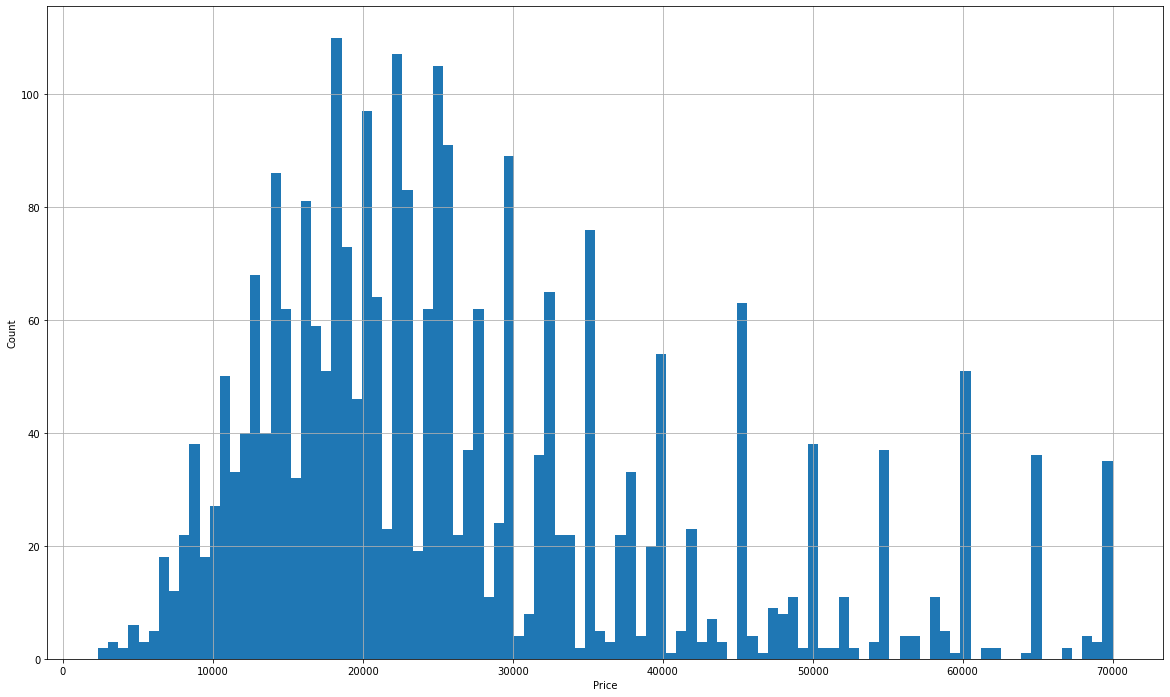

In [42]:
df['price'].hist(figsize = (20, 12), bins = 100)
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [43]:
df.groupby("township").agg({"price": ["mean", "median"], "car_boxes": "mean", "rooms": "mean",
                            "bathroms": "mean", "squareM":["mean", "median"]})

price          car_boxes rooms bathroms squareM       
                        mean   median      mean  mean     mean    mean median
township                                                                     
alvaro obregon      24533.21 22000.00      1.71  2.18     2.07  123.17 108.50
azcapotzalco        10927.30 10500.00      0.89  2.22     1.41   70.40  65.00
benito juarez       20069.27 19000.00      1.36  2.17     1.90  101.83  90.00
coyoacan            17639.34 15500.00      1.39  2.28     1.84   94.39  90.00
cuajimalpa          28761.33 25000.00      1.82  2.20     2.14  158.11 120.00
cuauhtemoc          21422.20 20000.00      0.95  1.88     1.63   90.40  85.00
gustavo a. madero    9845.00  9500.00      0.80  1.95     1.45   72.75  65.00
iztacalco           10516.67 10500.00      0.94  2.06     1.44   68.56  68.50
iztapalapa           7477.78  7000.00      0.56  2.22     1.11   65.33  65.00
magdalena contreras 17907.69 16500.00      1.54  2.23     2.38  125.77 110.00
miguel hidalgo      33222.77 30000.00      1.59  2.27     2.09  151.29 120.00
tlalpan             21398.19 19000.00      1.66  2.47     2.01  130.96 110.00
venustiano carranza  8055.56  8000.00      0.44  2.00     1.22   57.89  58.00
xochimilco          11850.00 11850.00      1.50  2.00     1.50   97.00  97.00